In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [3]:
#Creating dataframe for data.
data = pd.read_csv('./data/cancer_rnaseq_data.csv', delimiter=',',index_col=0)
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns in data.')

There are 801 rows and 20531 columns in data.


In [4]:
#Inspect first 5 rows of data.
data.head(5)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [5]:
#Creating dataframe for labels.
labels = pd.read_csv('./data/cancer_rnaseq_labels.csv', delimiter=',')
nRow, nCol = labels.shape
print(f'There are {nRow} rows and {nCol} columns in labels dataframe.')

There are 801 rows and 2 columns in labels dataframe.


In [6]:
#Inspect first 5 rows of labels.
labels.head(5)

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [7]:
#Find unique classes of cancer subtypes.
labels['Class'].unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [8]:
#Create a 2D numpy array of values in data.
X = data.values
X[0:5]

array([[ 0.        ,  2.01720929,  3.26552691, ...,  8.92132623,
         5.28675919,  0.        ],
       [ 0.        ,  0.59273209,  1.58842082, ...,  9.39785429,
         2.09416849,  0.        ],
       [ 0.        ,  3.51175898,  4.32719872, ..., 10.09046974,
         1.68302267,  0.        ],
       [ 0.        ,  3.66361787,  4.50764878, ...,  9.68436467,
         3.29200131,  0.        ],
       [ 0.        ,  2.65574107,  2.82154696, ...,  9.46119088,
         5.1103716 ,  0.        ]])

In [9]:
#Standardize the features before performing dimensionality reduction, (mean=0,standard deviation =1)
X_std = StandardScaler().fit_transform(X)

Performing Principal Component Analysis (PCA) ...


Text(0.5, 1.0, 'PCA')

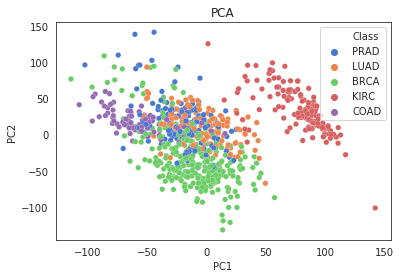

In [11]:
#Visualize data using Principal Component Analysis.
print("Performing Principal Component Analysis (PCA) ...")
pca = PCA(n_components = 2).fit_transform(X_std)
pca_df = pd.DataFrame(data=pca, columns=['PC1','PC2']).join(labels)
palette = sns.color_palette("muted", n_colors=5)
sns.set_style("white")
sns.scatterplot(x='PC1',y='PC2',hue='Class',data=pca_df, palette=palette, linewidth=0.2, s=30, alpha=1).set_title('PCA')

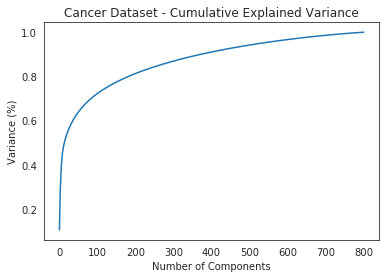

In [12]:
#Fitting PCA on Data
pca_std = PCA().fit(X_std)
percent_variance=pca_std.explained_variance_ratio_*100

#Plotting Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca_std.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Cancer Dataset - Cumulative Explained Variance')
plt.show()

Performing t-Distributed Stochastic Neighbor Embedding (tSNE) ...


Text(0.5, 1.0, 't-SNE')

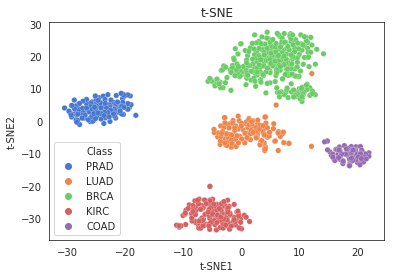

In [17]:
#Visualize data using t-SNE.
print("Performing t-Distributed Stochastic Neighbor Embedding (tSNE) ...")
model = TSNE(learning_rate = 10, n_components = 2, random_state=123, perplexity = 30)
tsne = model.fit_transform(X_std)
tsne_df = pd.DataFrame(data=tsne, columns=['t-SNE1','t-SNE2']).join(labels)
palette = sns.color_palette("muted", n_colors=5)
sns.set_style("white")
sns.scatterplot(x='t-SNE1',y='t-SNE2',hue='Class',data=tsne_df, palette=palette, linewidth=0.2, s=30, alpha=1).set_title('t-SNE')

In [14]:
#Measure execution time for t-SNE
def tsne_model(X):
    model = TSNE(learning_rate = 10, n_components = 2, random_state = 123, perplexity = 30)
    tsne = model.fit_transform(X)
    return tsne
from timeit import Timer
  
t = Timer(lambda: tsne_model(X_std))
print(t.timeit(number=1))

24.821596699999645


Performing T-Distributed Stochastic Neighbor Embedding (tSNE) on PCA ...


Text(0.5, 1.0, 't-SNE after PCA')

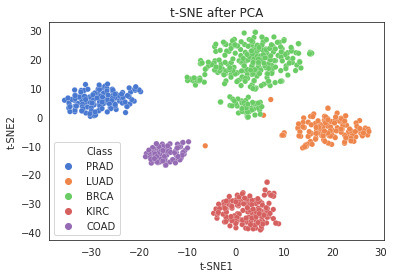

In [15]:
#Visualize data using t-SNE after PCA.
print("Performing t-Distributed Stochastic Neighbor Embedding (tSNE) on PCA ...")
X_reduced = PCA(n_components =100 ).fit_transform(X_std)
model = TSNE(learning_rate = 10, n_components = 2, random_state = 123, perplexity = 30)
tsne_pca = model.fit_transform(X_reduced)
tsne_pca_df = pd.DataFrame(data=tsne_pca, columns=['t-SNE1','t-SNE2']).join(labels)
palette = sns.color_palette("muted", n_colors=5)
sns.set_style("white")
sns.scatterplot(x='t-SNE1',y='t-SNE2',hue='Class',data=tsne_pca_df, palette=palette, linewidth=0.2, s=30, alpha=1).set_title('t-SNE after PCA')



In [16]:
#Measure execution time for t-SNE after PCA
def tsne_model_pca(X):
    X_reduced = PCA(n_components =50 ).fit_transform(X)
    model = TSNE(learning_rate = 10, n_components = 2, random_state = 123, perplexity = 30)
    tsne_pca = model.fit_transform(X_reduced)
    return tsne_pca
from timeit import Timer
  
t = Timer(lambda: tsne_model_pca(X_std))
print(t.timeit(number=1))

4.491065700000036


Performing Uniform Manifold Approximation and Projection (UMAP) ...


Text(0.5, 1.0, 'UMAP')

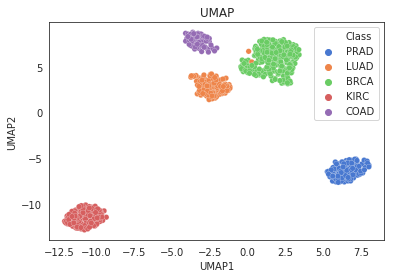

In [19]:
#Visualize data using UMAP.
print("Performing Uniform Manifold Approximation and Projection (UMAP) ...")
model = UMAP(n_neighbors = 30, min_dist = 0.4, n_components = 2)
umap = model.fit_transform(X_std)
umap_df = pd.DataFrame(data=umap, columns=['UMAP1','UMAP2']).join(labels)
palette = sns.color_palette("muted", n_colors=5)
sns.set_style("white")
sns.scatterplot(x='UMAP1',y='UMAP2',hue='Class',data=umap_df, palette=palette, linewidth=0.2, s=30, alpha=1).set_title('UMAP')

In [20]:
#Measure execution time for UMAP
def umap(X):
    X_reduced = PCA(n_components =50 ).fit_transform(X)
    model = TSNE(learning_rate = 10, n_components = 2, random_state = 123, perplexity = 30)
    tsne_pca = model.fit_transform(X)
    return tsne_pca
from timeit import Timer
  
t = Timer(lambda: tsne_model_pca(X_std))
print(t.timeit(number=1))

4.4035676999992575
